# 1. 数値計算による1次元移流方程式の近似

深層学習ベースの流体シミュレーションをする準備段階として下記の移流方程式を離散化，数値計算で近似し，解析解と比較します．

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

この方程式は移動する物理量uを時間t，空間x，移流速度cで表現したものです．

**参考**
- Lonena Barba [CFD Python: 12 steps to Navier-Stokes](https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)
- 暗黙の型宣言 [改訂版　流体計算で覚えるPython3](https://fortran.booth.pm/items/832150)

## モジュールをインポート

In [1]:
import numpy as np
import pylab as plt
from IPython import display as dp

## 定数を定義

In [2]:
#空間
Lx = 1. #計算領域
Nx = 51 #計算点数
dx = Lx / (Nx-1) #離散点間の距離

#時間
Lt = 1. #計算時間
Nt = 500 #計算回数
dt = Lt / Nt #計算時間の間隔

#移流速度
c = 1.

## 初期条件

In [3]:
def initial(Lx,Nx):
    """
    空間の初期化
    """
    x = np.linspace(0, Lx, Nx, dtype=np.float32)
    u = (1. - np.cos(2 * np.pi * x / Lx) / 2.) ** 8
    return x,u

## 解析解

In [4]:
def calc_anly(Lx,x,n,dt,c=1.):
    """
    解析解算出
    """
    u_anly_next = (1. - np.cos(2 * np.pi * (x -c*n*dt) / Lx) / 2.) ** 8
    return u_anly_next

## 空間微分

In [5]:
def calc_diff(u, dx):
    '''
    中心差分法（2次方法）
    '''
    dudx = np.zeros_like(u)
    dudx[1:-1] = u[2:] - u[:-2]
    dudx[0] = u[1] - u[-1]
    dudx[-1] = u[0] - u[-2]
    dudx /= 2 * dx
    return dudx

## 時間積分

In [6]:
def forward_euler(u, dx, dt, c=1.):
    '''
    オイラー法（1次方法）
    '''
    dudx = calc_diff(u, dx)
    u_next = u - c * dudx * dt
    return u_next

def modified_euler(u, dx, dt, c=1.):
    '''
    修正オイラー法（2次方法）
    '''
    dudx05 = calc_diff(u, dx)
    u05 = u - c * dudx05 * dt
    dudx = calc_diff(u05, dx)
    u_next = u - c*(dudx05+dudx)/2.*dt
    return u_next

## 中心差分法（空間微分），オイラー法（時間積分）
オイラー法は1次方法であるため精度が低いです．

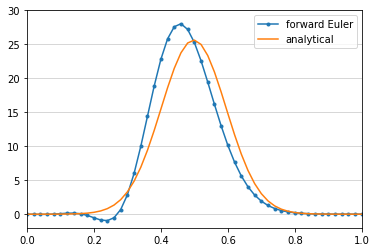

In [7]:
x,u = initial(Lx,Nx)
u_for = u

fig, ax = plt.subplots()

for_euler, = ax.plot(x, u, marker='.',c='tab:blue',label='forward Euler')
analytical, = ax.plot(x, u,marker='',c='tab:orange',label='analytical') 

ax.set_xlim(0,1)
ax.set_ylim(-2,30)
ax.grid(axis='y', lw=0.5)
ax.legend(loc='best')

dp.display(fig)
dp.clear_output(wait=True)

for step in range(Nt):
    u_for = forward_euler(u_for, dx, dt)
    u_anly = calc_anly(Lx,x,step,dt)
    
    for_euler.set_ydata(u_for)
    analytical.set_ydata(u_anly)
    
    dp.display(fig)
    dp.clear_output(wait=True)

## 中心差分法（空間微分），修正オイラー法（時間積分）
修正オイラー法は2次方法であるため1次のオイラー法に比べて精度が高いです．

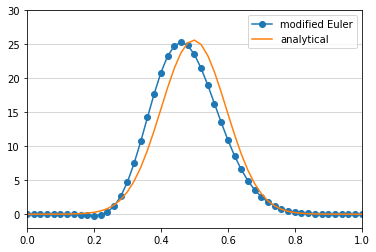

In [8]:
x,u = initial(Lx,Nx)
u_mod = u

fig, ax = plt.subplots()

mod_euler, = ax.plot(x, u, marker='o',c='tab:blue', label='modified Euler')
analytical, = ax.plot(x, u,marker='',c='tab:orange',label='analytical') 

ax.set_xlim(0,1)
ax.set_ylim(-2,30)
ax.grid(axis='y', lw=0.5)
ax.legend(loc='best')

dp.display(fig)
dp.clear_output(wait=True)

for step in range(Nt):
    u_mod = modified_euler(u_mod, dx, dt)
    u_anly = calc_anly(Lx,x,step,dt)
    
    mod_euler.set_ydata(u_mod)
    analytical.set_ydata(u_anly)
    
    dp.display(fig)
    dp.clear_output(wait=True)

## オイラー法と修正オイラー法の比較

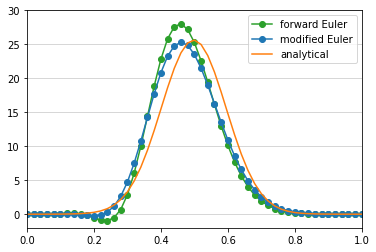

In [9]:
x,u = initial(Lx,Nx)
u_for = u
u_mod = u

fig, ax = plt.subplots()

for_euler, = ax.plot(x, u, marker='o',c='tab:green',label='forward Euler')
mod_euler, = ax.plot(x, u, marker='o',c='tab:blue', label='modified Euler')
analytical, = ax.plot(x, u,marker='',c='tab:orange',label='analytical') 

ax.set_xlim(0,1)
ax.set_ylim(-2,30)
ax.grid(axis='y', lw=0.5)
ax.legend(loc='best')

dp.display(fig)
dp.clear_output(wait=True)

for step in range(Nt):
    u_for = forward_euler(u_for, dx, dt)
    u_mod = modified_euler(u_mod, dx, dt)
    u_anly = calc_anly(Lx,x,step,dt)
    
    for_euler.set_ydata(u_for)
    mod_euler.set_ydata(u_mod)
    analytical.set_ydata(u_anly)
    
    dp.display(fig)
    dp.clear_output(wait=True)